# CNN_UTK_Model for Age detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [7]:
# taking range of 5
df['age'] //= 5

### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

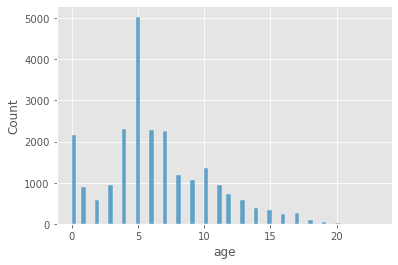

In [8]:
sns.histplot(data=df, x='age')

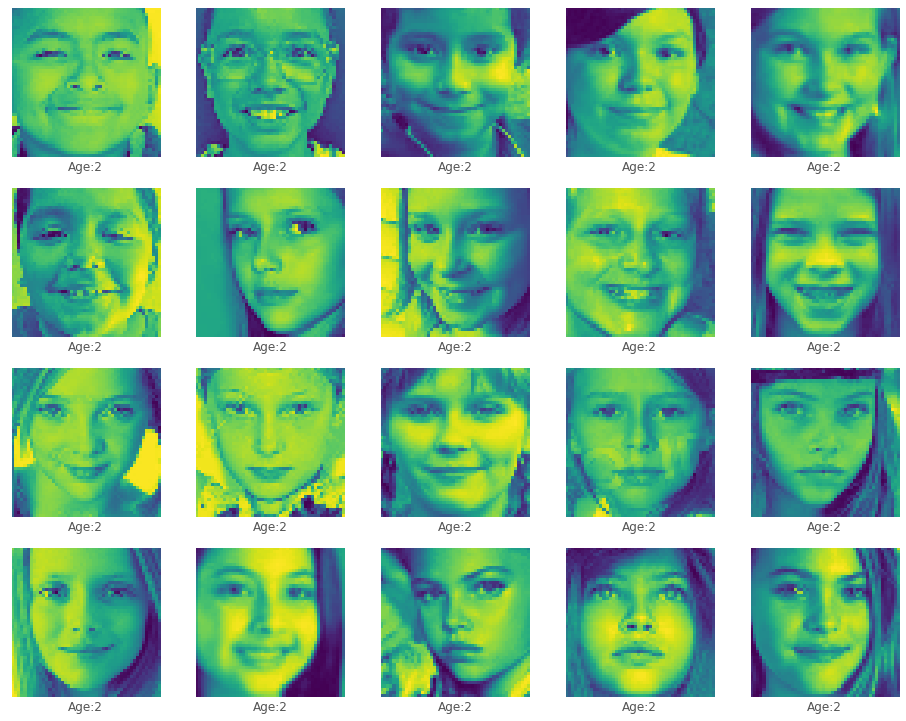

In [9]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [10]:
X = np.array(df['pixels'].tolist())
y = df['age']

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X = X.reshape(X.shape[0],48,48,1)

In [13]:
X[:5].shape

(5, 48, 48, 1)

In [14]:
y[:5].shape

(5,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model creation

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [2]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(8, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4232)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                67728     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 67,825
Trainable params: 67,825
Non-trainable params: 0
_________________________________________________________________


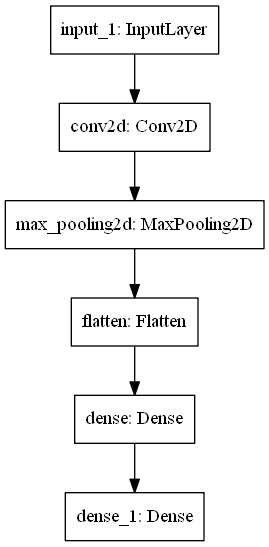

In [3]:
plot_model(model, to_file='models/cnn_utk_model_1_age-range.png')

In [18]:
filepath = 'checkpoints/age_range_model1_corrected_normalized.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [19]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/100
330/334 [============================>.] - ETA: 0s - loss: 14.8291 - mae: 2.9411
Epoch 00001: val_loss improved from inf to 10.13236, saving model to checkpoints\age_range_model1_corrected_normalized.epoch01-loss10.13.hdf5
334/334 [==============================] - 5s 14ms/step - loss: 14.7876 - mae: 2.9364 - val_loss: 10.1324 - val_mae: 2.4614
Epoch 2/100
333/334 [============================>.] - ETA: 0s - loss: 10.2997 - mae: 2.4851
Epoch 00002: val_loss improved from 10.13236 to 9.03636, saving model to checkpoints\age_range_model1_corrected_normalized.epoch02-loss9.04.hdf5
334/334 [==============================] - 5s 15ms/step - loss: 10.2965 - mae: 2.4848 - val_loss: 9.0364 - val_mae: 2.2674
Epoch 3/100
330/334 [============================>.] - ETA: 0s - loss: 9.3737 - mae: 2.3603
Epoch 00003: val_loss improved from 9.03636 to 8.71113, saving model to checkpoints\age_range_model1_corrected_normalized.epoch03-loss8.71.hdf5
334/334 [==============================] - 5

Epoch 26/100
334/334 [==============================] - ETA: 0s - loss: 4.4928 - mae: 1.5749
Epoch 00026: val_loss improved from 5.57614 to 5.33279, saving model to checkpoints\age_range_model1_corrected_normalized.epoch26-loss5.33.hdf5
334/334 [==============================] - 5s 16ms/step - loss: 4.4928 - mae: 1.5749 - val_loss: 5.3328 - val_mae: 1.6840
Epoch 27/100
331/334 [============================>.] - ETA: 0s - loss: 4.4133 - mae: 1.5637
Epoch 00027: val_loss did not improve from 5.33279
334/334 [==============================] - 5s 16ms/step - loss: 4.4107 - mae: 1.5629 - val_loss: 5.4430 - val_mae: 1.7061
Epoch 28/100
333/334 [============================>.] - ETA: 0s - loss: 4.2965 - mae: 1.5420
Epoch 00028: val_loss did not improve from 5.33279
334/334 [==============================] - 5s 16ms/step - loss: 4.2962 - mae: 1.5422 - val_loss: 5.5422 - val_mae: 1.7580
Epoch 29/100
331/334 [============================>.] - ETA: 0s - loss: 4.2517 - mae: 1.5394
Epoch 00029: val

Epoch 83/100
331/334 [============================>.] - ETA: 0s - loss: 1.2386 - mae: 0.8148
Epoch 00083: val_loss did not improve from 4.67479
334/334 [==============================] - 5s 16ms/step - loss: 1.2410 - mae: 0.8154 - val_loss: 5.3651 - val_mae: 1.6423
Epoch 84/100
331/334 [============================>.] - ETA: 0s - loss: 1.2451 - mae: 0.8172
Epoch 00084: val_loss did not improve from 4.67479
334/334 [==============================] - 5s 16ms/step - loss: 1.2446 - mae: 0.8171 - val_loss: 5.3089 - val_mae: 1.6430
Epoch 85/100
331/334 [============================>.] - ETA: 0s - loss: 1.2338 - mae: 0.8143
Epoch 00085: val_loss did not improve from 4.67479
334/334 [==============================] - 5s 16ms/step - loss: 1.2329 - mae: 0.8139 - val_loss: 5.5364 - val_mae: 1.6699
Epoch 86/100
332/334 [============================>.] - ETA: 0s - loss: 1.1882 - mae: 0.7973
Epoch 00086: val_loss did not improve from 4.67479
334/334 [==============================] - 5s 16ms/step - 

<AxesSubplot:>

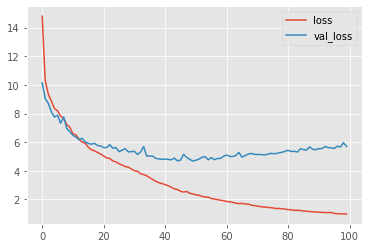

In [20]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [21]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

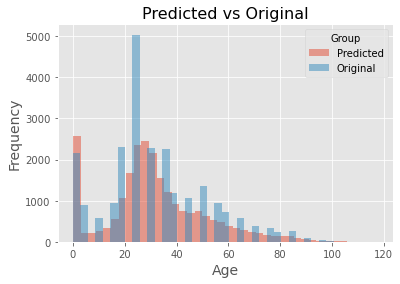

In [22]:
pd.Series((5 * y_pred.reshape((len(y_pred))))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
(5 * y).plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

### Predictions for best model

In [27]:
import os
path = os.getcwd() + r'\checkpoints\age_range_model1_corrected_normalized.epoch50-loss4.67.hdf5'

In [28]:
best_model = tf.keras.models.load_model(path)

In [29]:
y_pred_best = best_model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

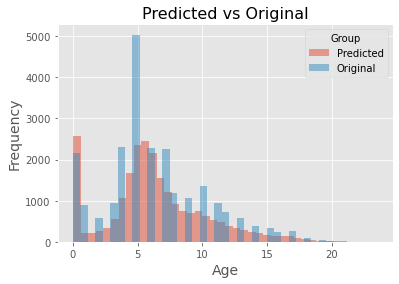

In [30]:
pd.Series(y_pred.reshape((len(y_pred_best)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)